In [6]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np
from scipy.interpolate import griddata

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

## 1.1 读取多个时次的模式预报数据 PRMSL

In [8]:
%time
directory850 = "ECMWF_HR/TMP/850"
directorySeaLevel = "ECMWF_HR/PRMSL"
fhours = np.arange(0, 120, 12)
filenames = ['22062820.'+'%03d'%(fhour) for fhour in fhours]
T850 = get_model_grids(directory850, filenames, varname='TMP', varattrs={'long_name':'850hPa T', 'units':'C'}, cache=False)
HSeaLevel = get_model_grids(directorySeaLevel, filenames, varname='PRMSL', varattrs={'long_name':'Sea Level Pressure', 'units':'hPa'}, cache=False)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.34 µs


In [9]:
HSeaLevel

<xarray.Dataset>
Dimensions:                  (time: 10, lat: 721, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-28T20:00:00 ... 20...
  * lat                      (lat) float64 -10.0 -9.875 -9.75 ... 79.88 80.0
  * lon                      (lon) float64 0.0 0.125 0.25 ... 179.8 179.9 180.0
    forecast_reference_time  datetime64[ns] 2022-06-28T20:00:00
    forecast_period          (time) float64 0.0 12.0 24.0 ... 84.0 96.0 108.0
Data variables:
    PRMSL                    (time, lat, lon) float32 1.016e+03 ... 1.018e+03
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

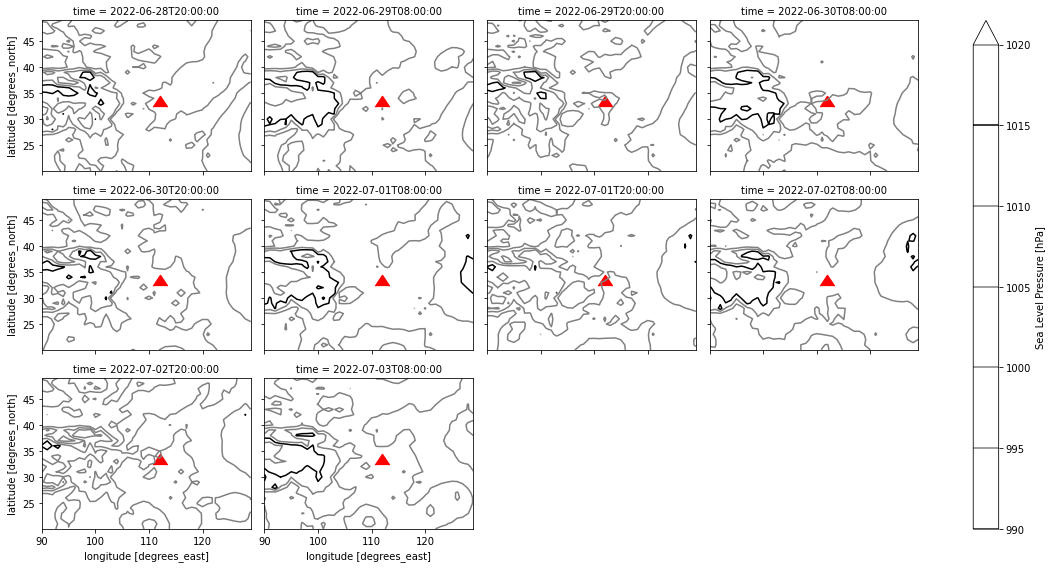

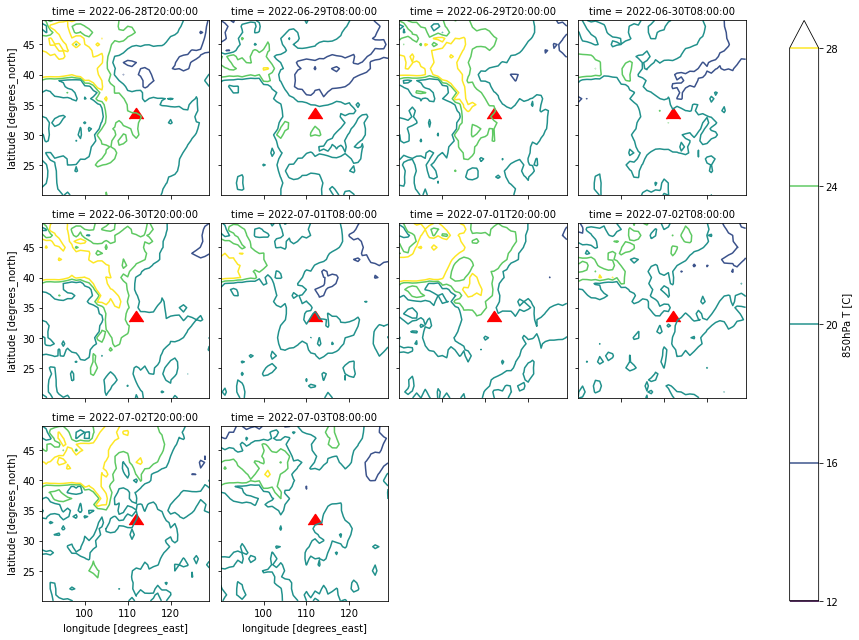

In [10]:
# 绘制图像
left = 90
right=130
top = 50
bottom = 20

lon=np.arange(left,right,1)
lat=np.arange(bottom,top,1)

T850Area = T850.TMP.isel(level=0).sel(lon=lon,lat=lat, method="nearest")
HSeaLevelArea = HSeaLevel.PRMSL.sel(lon=lon,lat=lat, method="nearest")

HSeaLevelcolors = ['gray']*10
HSeaLevelcolors[-3] = HSeaLevelcolors[-5] = 'black'

p = HSeaLevelArea.plot.contour(figsize=(16, 8), col='time', col_wrap=4, levels=np.arange(990,1025,5), colors = HSeaLevelcolors, add_colorbar=True) #[24, 28]

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)


p = T850Area.plot.contour(col='time', col_wrap=4, levels=[12, 16, 20, 24, 28],add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

## 1.2 Draw Surface Plot

In [11]:
""" 
SURFACE/PLOT_GLOBAL_1H
SURFACE/PLOT_GLOBAL_3H
mdfs:///SURFACE/PLOT_GLOBAL_ALL_1H/20220625130000.000
mdfs:///SURFACE/PLOT_GLOBAL_ALL_3H/20220625130000.000 
mdfs:///SURFACE/PLOT_NATIONAL_1H/20220625130000.000
mdfs:///SURFACE/PLOT_NATIONAL/20220625130000.000

"""
plotSurface = get_station_data("SURFACE/PLOT_GLOBAL_ALL_1H", "20220629080000.000", dropna=True, cache=False)
plotSurface

,ID,lon,lat,Wind_angle_2m_avg,Wind_speed_2m_avg,Grade,Name,Sea_level_pressure,Dewpoint,Alt,...,Pressure_24h_trend,Middle_cloud,High_cloud,Low_cloud_cover,Low_cloud,Cloud_base_hight,Rain_6h,Temp_24h_trend,Rain_3h,time
0,1000015,0.000000,0.000000,999997.0,2.0,15,b'45047',NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-29 08:00:00
1,1000014,113.980003,22.469999,80.0,2.0,15,b'45035',1003.000000,26.100000,35.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-29 08:00:00
2,1000013,114.300003,22.170000,50.0,7.0,15,b'45045',1002.799988,26.400000,60.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-29 08:00:00
3,1000012,114.199997,22.400000,10.0,1.0,15,b'45039',1003.200012,26.900000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-29 08:00:00
4,1000011,114.169998,22.309999,90.0,3.0,15,b'45004',1002.700012,25.500000,66.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-29 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,59948,109.589996,18.230000,225.0,1.2,15,b'59948',1002.500000,25.799999,419.399994,...,-43.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,2022-06-29 08:00:00
9752,59951,110.330002,18.799999,188.0,1.8,15,b'59951',1001.900024,25.600000,40.400002,...,-41.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,NaN,2022-06-29 08:00:00
9753,59954,110.029999,18.549999,298.0,1.4,15,b'59954',1002.000000,25.299999,35.200001,...,-44.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,2022-06-29 08:00:00
9754,59981,112.330002,16.830000,289.0,0.3,15,b'59981',1001.799988,25.900000,5.100000,...,-46.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,NaN,2022-06-29 08:00:00


In [12]:
plotSurface[0:1].to_json()

'{"ID":{"0":1000015},"lon":{"0":0.0},"lat":{"0":0.0},"Wind_angle_2m_avg":{"0":999997.0},"Wind_speed_2m_avg":{"0":2.0},"Grade":{"0":15},"Name":{"0":"45047"},"Sea_level_pressure":{"0":null},"Dewpoint":{"0":null},"Alt":{"0":null},"Pressure_3h_trend":{"0":null},"Temp":{"0":null},"Weather_current":{"0":null},"Weather_past_1":{"0":null},"Weather_past_2":{"0":null},"Vis_manual":{"0":null},"Total_cloud_cover":{"0":null},"Pressure_24h_trend":{"0":null},"Middle_cloud":{"0":null},"High_cloud":{"0":null},"Low_cloud_cover":{"0":null},"Low_cloud":{"0":null},"Cloud_base_hight":{"0":null},"Rain_6h":{"0":null},"Temp_24h_trend":{"0":null},"Rain_3h":{"0":null},"time":{"0":1656489600000}}'

In [13]:
sea_level_pressure = plotSurface[['ID', 'lon', 'lat', 'Sea_level_pressure']]

In [14]:
SLP = sea_level_pressure.dropna(how='any')
SLP = SLP[(bottom <= SLP['lat']) & (SLP['lat'] <= top) &
            (left <= SLP['lon']) & (SLP['lon'] <= right)]

SLP

,ID,lon,lat,Sea_level_pressure
1,1000014,113.980003,22.469999,1003.000000
2,1000013,114.300003,22.170000,1002.799988
3,1000012,114.199997,22.400000,1003.200012
4,1000011,114.169998,22.309999,1002.700012
8,1000007,113.570000,22.129999,1003.299988
...,...,...,...,...
9730,59664,110.989998,21.549999,1002.200012
9731,59673,112.769997,21.740000,1003.099976
9732,59750,110.070000,20.959999,1001.700012
9733,59754,110.160004,20.240000,1001.500000


### Contour plot of irregularly spaced data
https://matplotlib.org/stable/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py

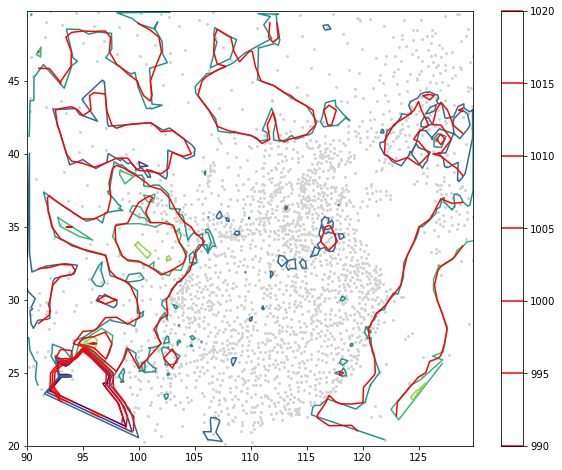

In [19]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

levels=np.arange(990,1025,5)

ax.plot(SLP.lon, SLP.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(SLP.lon, SLP.lat, SLP.Sea_level_pressure, levels=levels)

#Interpolate the data to a regular grid first.
SLP_Grid = griddata((SLP.lon, SLP.lat), SLP.Sea_level_pressure, (lon[None, :], lat[:, None]), method='linear')
cntr = ax.contour(lon, lat, SLP_Grid, levels=levels, colors = 'red') #add_colorbar=True

fig.colorbar(cntr, ax=ax)

## 1.3 Draw SLP Diff

In [16]:
dti = pd.date_range("2022-06-28 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")

""" 
BEIJING_MR/HGT/500/22062420.000 
"ECMWF_HR/HGT/500"
GRAPES_GFS/HGT/500/22062420.000
"GERMAN_HR/GEOPOTENTIAL/500"
JAPAN_MR/HGT/500/22062420.000
NCEP_GFS_HR/HGT/500/22062408.000

SHANGHAI_MR/HGT/500/22062420.000
"""
directoryPRMSL = 'ECMWF_HR/PRMSL'
fhours = np.arange(12, 12*7, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

HPRMSL = get_model_grids(directoryPRMSL, filenames, varname='PRMSL', varattrs={'long_name':'PRMSL', 'units':'hPa'}, allExists=False, cache=False)

HPRMSL

2022-06-28 20:00:00    22062820.012
2022-06-28 08:00:00    22062808.024
2022-06-27 20:00:00    22062720.036
2022-06-27 08:00:00    22062708.048
2022-06-26 20:00:00    22062620.060
2022-06-26 08:00:00    22062608.072
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, lat: 721, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-29T08:00:00 ... 20...
  * lat                      (lat) float64 -10.0 -9.875 -9.75 ... 79.88 80.0
  * lon                      (lon) float64 0.0 0.125 0.25 ... 179.8 179.9 180.0
    forecast_reference_time  (time) datetime64[ns] 2022-06-28T20:00:00 ... 20...
    forecast_period          (time) float64 12.0 24.0 36.0 48.0 60.0 72.0
Data variables:
    PRMSL                    (time, lat, lon) float32 1.017e+03 ... 999.5
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

6


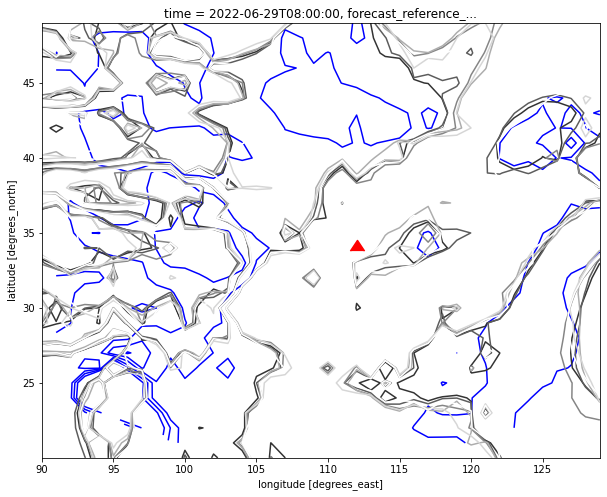

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

SLP_Grid = griddata((SLP.lon, SLP.lat), SLP.Sea_level_pressure, (lon[None, :], lat[:, None]), method='linear')
cntr = ax.contour(lon, lat, SLP_Grid, levels=levels, colors = 'blue') #add_colorbar=True

#fig.colorbar(cntr, ax=ax)
ax.scatter(112, 34.5, s=200, c='red', marker=6)

PRMSLArea = HPRMSL.PRMSL.sel(lon=lon,lat=lat, method="nearest")

print(PRMSLArea.sizes['time'])
for index in range(0,PRMSLArea.sizes['time']):
    colors = index/5 * (1-0.2) + 0.2
    PRMSLArea.isel(time=index).plot.contour(ax = ax, levels=levels, colors = str(colors) )
    pass


In [18]:
#learn griddata

print((lon[None, :], lat[:, None]))

zi = griddata((SLP.lon, SLP.lat), SLP.Sea_level_pressure, (lon[None, :], lat[:, None]), method='linear')

zi

(array([[ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129]]), array([[20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49]]))


array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [          nan, 1010.33882214, 1005.20837107, ..., 1002.74379323,
        1002.60846297, 1003.20383801],
       [          nan, 1006.26638007, 1005.31020852, ..., 1002.87235313,
        1003.03638878, 1003.35671686],
       [          nan, 1008.23897506, 1007.73977158, ..., 1002.91873834,
        1002.88310492, 1003.09654271]])